In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'Faraday effect Table 1.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'    # Replace with the correct sheet name


# Read the data from the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data (optional)
print(data)


   Current (A)  Magnetic Field Strength (Gauss)
0         0.50                              248
1         1.00                              470
2         1.50                              695
3         2.00                              918
4         2.50                             1142
5         3.00                             1348
6         3.50                             1540
7         3.88                             1640


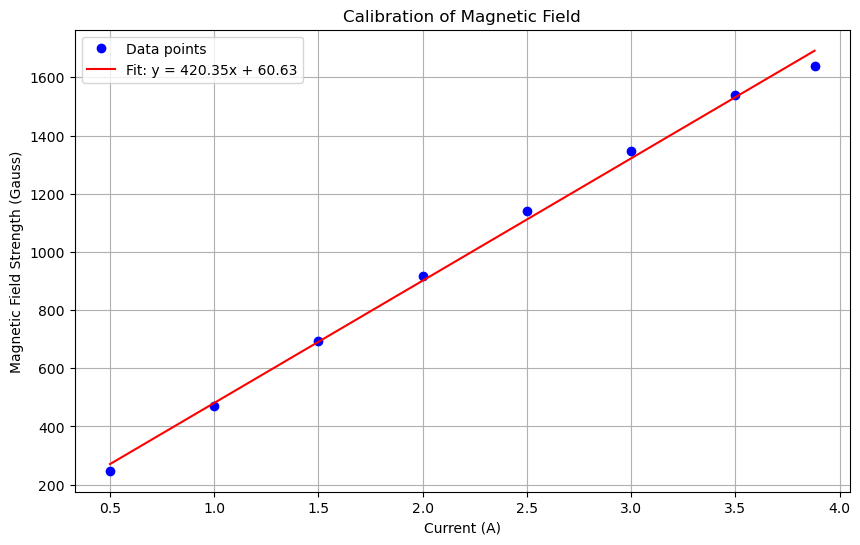

In [6]:
# Extract columns for plotting
x = data['Current (A)']  # Replace with your x column name
y = data['Magnetic Field Strength (Gauss)']  # Replace with your y column name

# Perform linear fit
slope, intercept = np.polyfit(x, y, 1)
fit_line = slope * x + intercept

# Plot the data and the linear fit
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data points', color='blue')         # Data points
plt.plot(x, fit_line, '-', color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('Current (A)')  
plt.ylabel('Magnetic Field Strength (Gauss)')
plt.title('Calibration of Magnetic Field')
plt.legend()     # Show legend
plt.grid(True)   # Show grid
plt.show()

In [12]:


# Load the Excel file
file_path = 'Faraday effect Table 2.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'    # Replace with the correct sheet name


# Read the data from the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data (optional)
print(data.head())


   lambda  theta_B_zero  theta_B_not_zero  angle_deg  angle_rad          V
0     404           205               184         21   0.366333  74.457995
1     435           205               191         14   0.244222  49.638663
2     505           205               195         10   0.174444  35.456188
3     546           205               197          8   0.139556  28.364950
4     578           205               198          7   0.122111  24.819332


0    74.495761
1    49.663841
2    35.474172
3    28.379337
4    24.831920
5    21.284503
dtype: float64


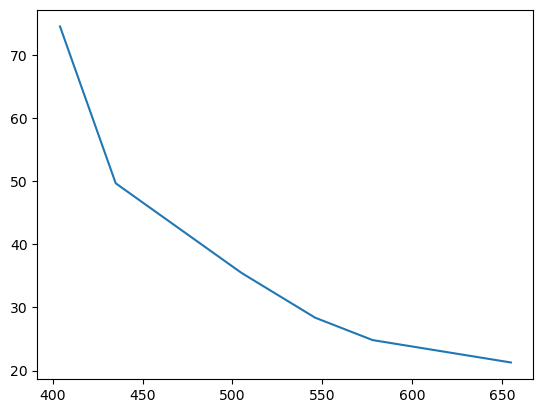

In [16]:
# Constants
B = 1640/10000  # Magnetic field strength in Tesla, replace with actual value
d = 0.03  # Path length in meters, replace with actual value


# Extract the columns
wavelength = data['lambda']  # Wavelength in nanometers
theta_B_zero = data['theta_B_zero']  # Angle without magnetic field
theta_B_not_zero = data['theta_B_not_zero']  # Angle with magnetic field
angle_deg = abs(theta_B_not_zero - theta_B_zero)  # Calculating angle difference in degrees

# Convert angle difference to radians
angle_rad = np.deg2rad(angle_deg)

# Calculate the Verdet constant for each wavelength
verdet_constant = angle_rad / (B * d)

# Add Verdet constant to the DataFrame for reference
data['Verdet Constant (rad/T*m)'] = verdet_constant

# Display the results
plt.plot(wavelength,verdet_constant)

print(verdet_constant)

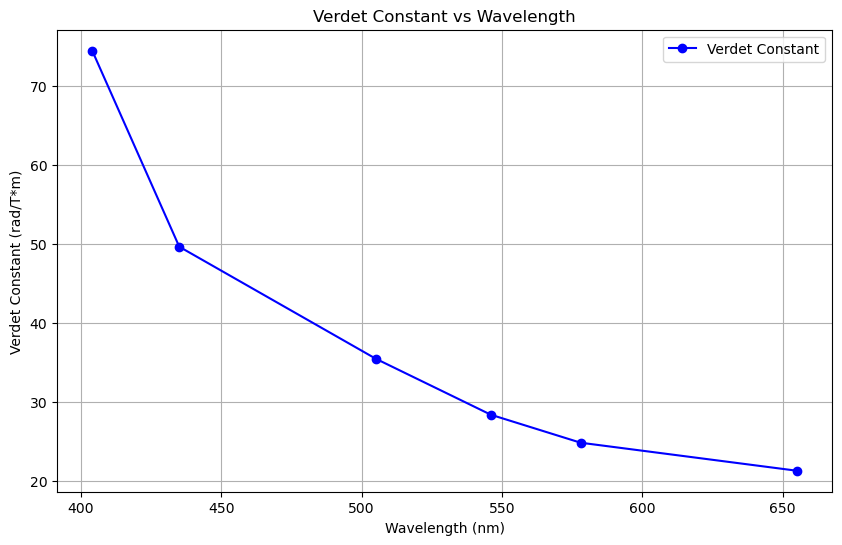

0    74.4958
1    49.6638
2    35.4742
3    28.3793
4    24.8319
5    21.2845
dtype: float64


In [ ]:

from scipy.stats import linregress

# Constants
B = 1640 / 10000  # Magnetic field strength in Tesla
d = 0.03          # Path length in meters

# Extract the columns
wavelength = data['lambda']  # Wavelength in nanometers
theta_B_zero = data['theta_B_zero']  # Angle without magnetic field
theta_B_not_zero = data['theta_B_not_zero']  # Angle with magnetic field

# Calculate the absolute angle difference in degrees
angle_deg = abs(theta_B_not_zero - theta_B_zero)

# Convert angle difference to radians
angle_rad = np.deg2rad(angle_deg)

# Calculate the Verdet constant for each wavelength
verdet_constant = angle_rad / (B * d)

# Round the Verdet constant values to 4 decimal places
verdet_constant_rounded = verdet_constant.round(4)

# Add Verdet constant to the DataFrame for reference
data['Verdet Constant (rad/T*m)'] = verdet_constant_rounded

# Save the updated DataFrame to a new Excel file
output_file = 'verdet_constant_results.xlsx'
data.to_excel(output_file, index=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(wavelength, verdet_constant_rounded, marker='o', linestyle='-', color='blue', label='Verdet Constant')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Verdet Constant (rad/T*m)')
plt.title('Verdet Constant vs Wavelength')
plt.grid(True)
plt.legend()
plt.show()

# Display the rounded Verdet constant values
print(verdet_constant_rounded)


In [27]:
from scipy.stats import linregress


# Load the Excel file
file_path = 'Faraday effect Table 3.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'    # Replace with the correct sheet name


# Read the data from the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data (optional)
print(data.head())


     I       B  angle_B_0  angle_B_notzero  angle_deg  angle(rad)          V
0  0.0  0.0248        257              258          1    0.017444  23.446834
1  0.5  0.0470        257              259          2    0.034889  24.743893
2  1.0  0.0695        257              260          3    0.052333  25.099920
3  1.5  0.0918        257              260          3    0.052333  19.002663
4  2.0  0.1142        257              261          4    0.069778  20.367127


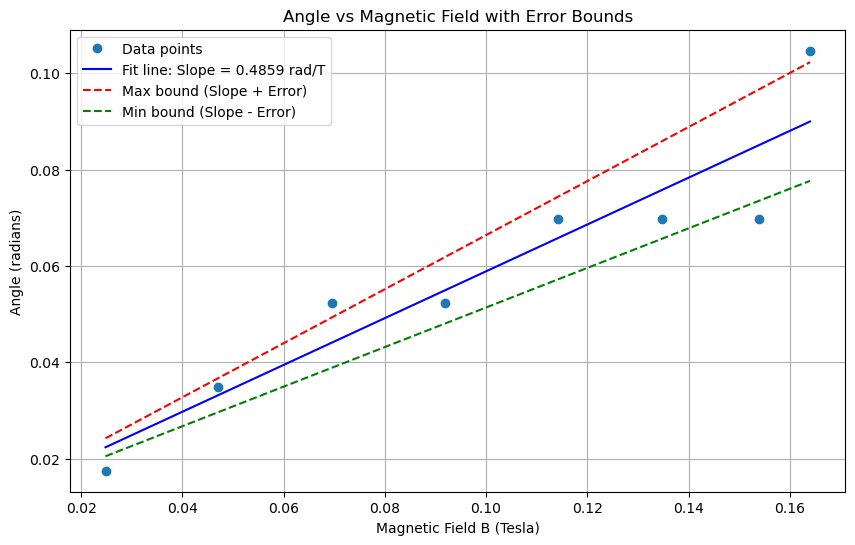

Verdet Constant from Slope (rad/T*m): 16.1963
Max Verdet Constant (rad/T*m): 18.7007
Min Verdet Constant (rad/T*m): 13.6919
Mean Verdet Constant from Table (rad/T*m): 20.7971


In [ ]:


# Create a DataFrame
df = pd.DataFrame(data)

# Calculate angle_deg and angle(rad)
df['angle_deg'] = abs(df['angle_B_notzero'] - df['angle_B_0'])  # Difference in degrees
df['angle(rad)'] = np.deg2rad(df['angle_deg'])  # Convert to radians

# Calculate Verdet constant (V) for each row
d = 0.03  # Path length in meters
df['V'] = df['angle(rad)'] / (df['B'] * d)

# Round each value to 4 decimal places
df = df.round(4)

# Save the DataFrame to an Excel file
output_file = 'verdet_constant_data.xlsx'
df.to_excel(output_file, index=False)

# Perform linear regression on angle(rad) vs B
slope, intercept, r_value, p_value, std_err = linregress(df['B'], df['angle(rad)'])

# Calculate Verdet constants from the slope, including the max and min bounds
verdet_constant_from_slope = slope / d
verdet_constant_from_slope_max = (slope + std_err) / d
verdet_constant_from_slope_min = (slope - std_err) / d

# Calculate the mean Verdet constant from the column 'V'
mean_verdet_constant = df['V'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['B'], df['angle(rad)'], 'o', label='Data points')

# Plot the fit line
plt.plot(df['B'], slope * df['B'] + intercept, '-', color='blue', label=f'Fit line: Slope = {slope:.4f} rad/T')
# Plot the max and min error bounds
plt.plot(df['B'], (slope + std_err) * df['B'] + intercept, '--', color='red', label=f'Max bound (Slope + Error)')
plt.plot(df['B'], (slope - std_err) * df['B'] + intercept, '--', color='green', label=f'Min bound (Slope - Error)')

# Labels and title
plt.xlabel('Magnetic Field B (Tesla)')
plt.ylabel('Angle (radians)')
plt.title('Angle vs Magnetic Field with Error Bounds')
plt.grid(True)
plt.legend()
plt.show()

# Display the calculated Verdet constants
print(f"Verdet Constant from Slope (rad/T*m): {verdet_constant_from_slope:.4f}")
print(f"Max Verdet Constant (rad/T*m): {verdet_constant_from_slope_max:.4f}")
print(f"Min Verdet Constant (rad/T*m): {verdet_constant_from_slope_min:.4f}")
print(f"Mean Verdet Constant from Table (rad/T*m): {mean_verdet_constant:.4f}")


In [37]:
 df['V'].mean()

20.797075

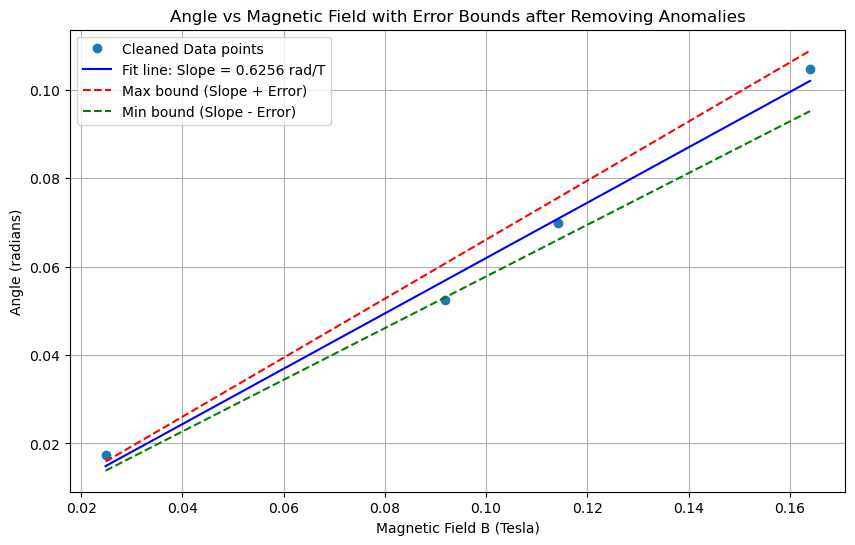

Verdet Constant from Slope (rad/T*m): 20.8526
Max Verdet Constant (rad/T*m): 22.2398
Min Verdet Constant (rad/T*m): 19.4653
Mean Verdet Constant from Cleaned Table (rad/T*m): 21.0333


In [44]:

from scipy.stats import linregress, zscore

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate angle_deg and angle(rad)
df['angle_deg'] = abs(df['angle_B_notzero'] - df['angle_B_0'])  # Difference in degrees
df['angle(rad)'] = np.deg2rad(df['angle_deg'])  # Convert to radians

# Calculate Verdet constant (V) for each row
d = 0.03  # Path length in meters
df['V'] = df['angle(rad)'] / (df['B'] * d)

# Detect and remove anomalies using Z-scores for 'V'
z_scores = zscore(df['V'])
df = df[(np.abs(z_scores) < 1)]  # Retain only rows where |Z-score| < 3

# Round each value to 4 decimal places
df = df.round(4)

# Save the cleaned DataFrame to an Excel file
output_file = 'cleaned_verdet_constant_data.xlsx'
df.to_excel(output_file, index=False)

# Perform linear regression on the cleaned angle(rad) vs B data
slope, intercept, r_value, p_value, std_err = linregress(df['B'], df['angle(rad)'])

# Calculate Verdet constants from the slope, including the max and min bounds
verdet_constant_from_slope = slope / d
verdet_constant_from_slope_max = (slope + std_err) / d
verdet_constant_from_slope_min = (slope - std_err) / d

# Calculate the mean Verdet constant from the column 'V' after removing anomalies
mean_verdet_constant = df['V'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['B'], df['angle(rad)'], 'o', label='Cleaned Data points')

# Plot the fit line
plt.plot(df['B'], slope * df['B'] + intercept, '-', color='blue', label=f'Fit line: Slope = {slope:.4f} rad/T')
# Plot the max and min error bounds
plt.plot(df['B'], (slope + std_err) * df['B'] + intercept, '--', color='red', label=f'Max bound (Slope + Error)')
plt.plot(df['B'], (slope - std_err) * df['B'] + intercept, '--', color='green', label=f'Min bound (Slope - Error)')

# Labels and title
plt.xlabel('Magnetic Field B (Tesla)')
plt.ylabel('Angle (radians)')
plt.title('Angle vs Magnetic Field with Error Bounds after Removing Anomalies')
plt.grid(True)
plt.legend()
plt.show()

# Display the calculated Verdet constants
print(f"Verdet Constant from Slope (rad/T*m): {verdet_constant_from_slope:.4f}")
print(f"Max Verdet Constant (rad/T*m): {verdet_constant_from_slope_max:.4f}")
print(f"Min Verdet Constant (rad/T*m): {verdet_constant_from_slope_min:.4f}")
print(f"Mean Verdet Constant from Cleaned Table (rad/T*m): {mean_verdet_constant:.4f}")
